In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [100]:
num_list = [3, 0, 11, 
            9, 21, 13, 
            15, 26, 18, 
            12, 25, 20, 
            5, 1, 23, 
            29, 22, 16, 
            24, 14, 4, 
            6, 7, 17, 
            8, 10, 28, 
            27, 2, 19]
gt_list = []
pred_list = []
gray_list = []
non_gt_list = []
for num in num_list:
    for angle in [47, 94, 141, 188, 235, 286]:
        gt_list.append(np.load("./output_2/test/ground_truth/npy/depth_image/frame_{:010d}.npy".format(angle+num*287)))
        pred_list.append(np.load("./output_2/test/npy/image/depth_{:010d}.npy".format(angle+num*287)))
#        gray_list.append(cv2.imread("./output_2/test/video/inputs/frame_{:010d}.png".format((num+1)*285*6-1)))
#        non_gt_list.append(np.load("./output_2/test/ground_truth/npy/depnpy/depth_{:010d}.npy".format(286+num*287)))

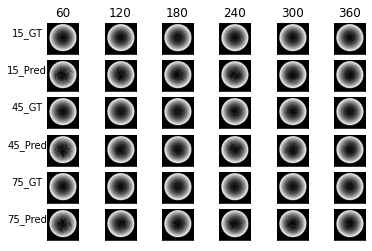

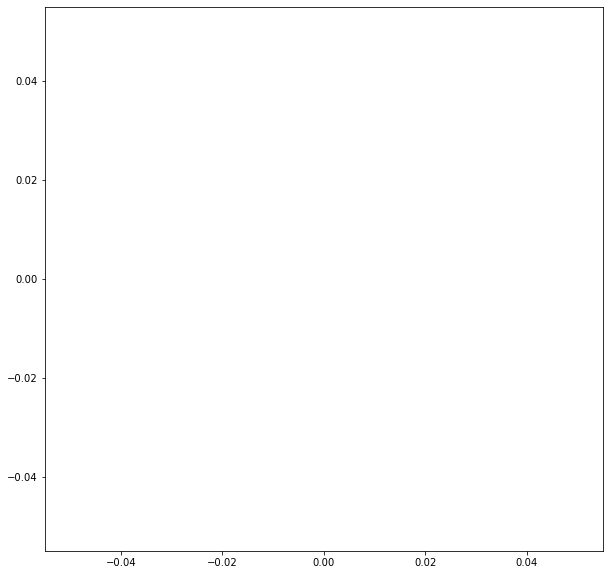

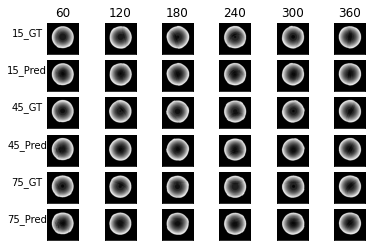

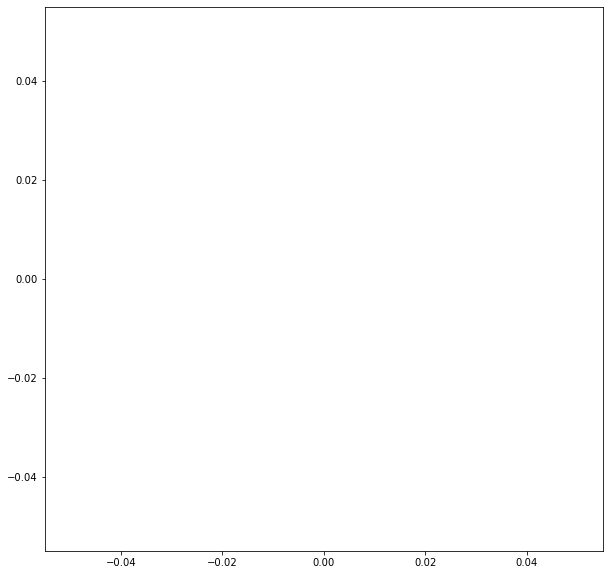

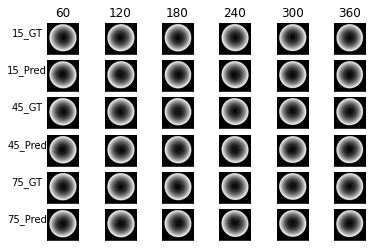

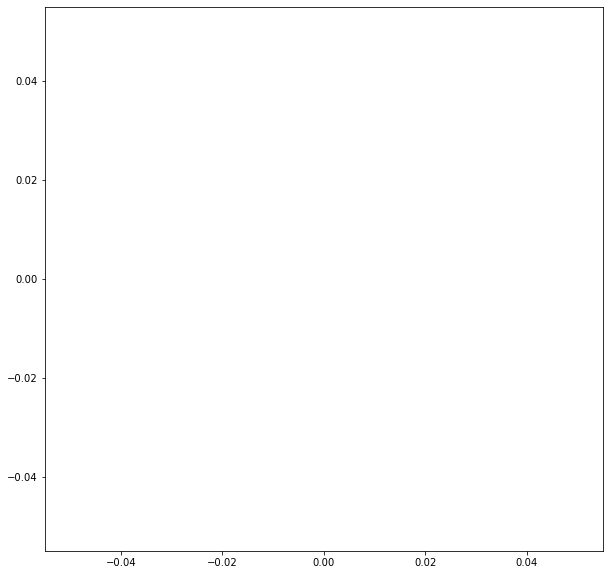

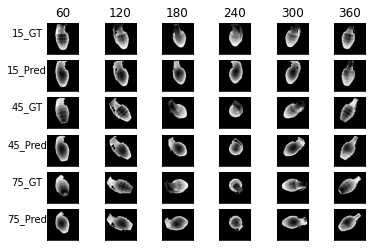

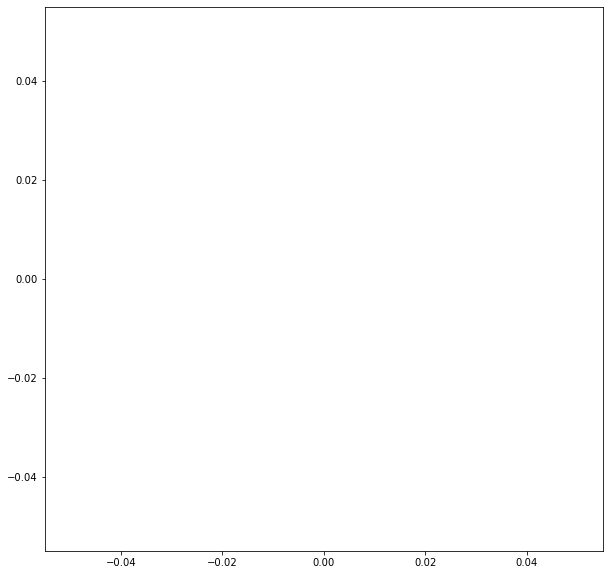

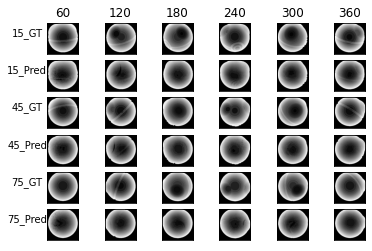

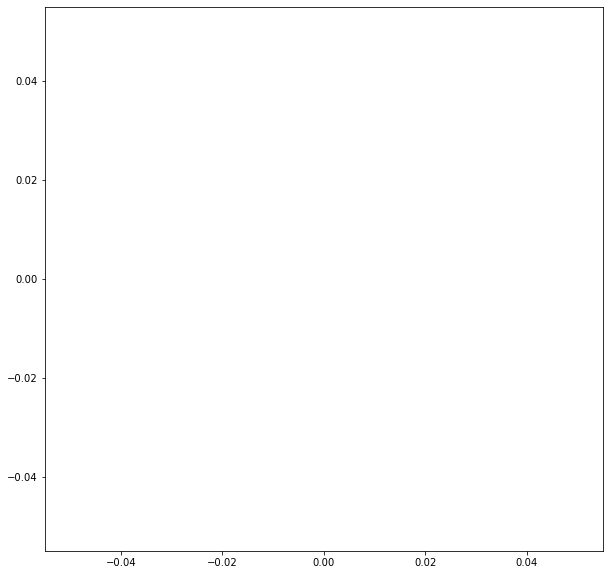

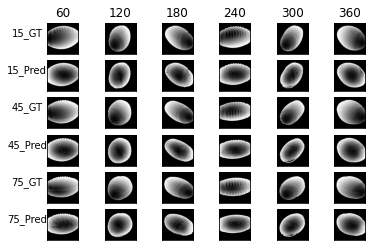

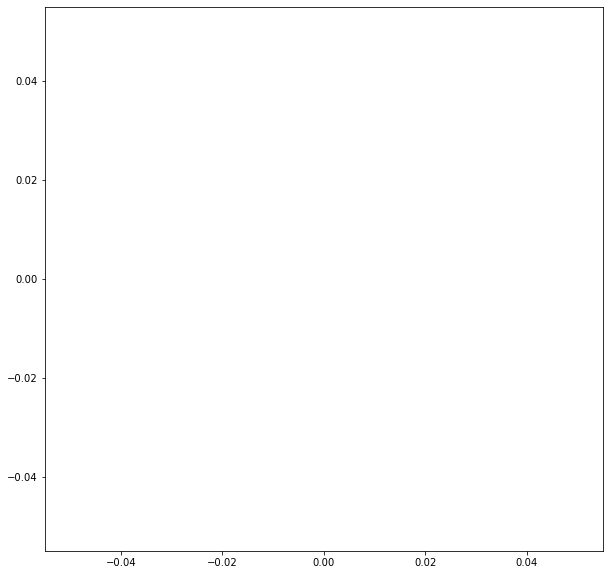

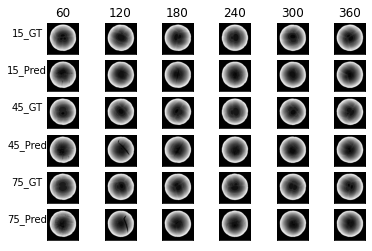

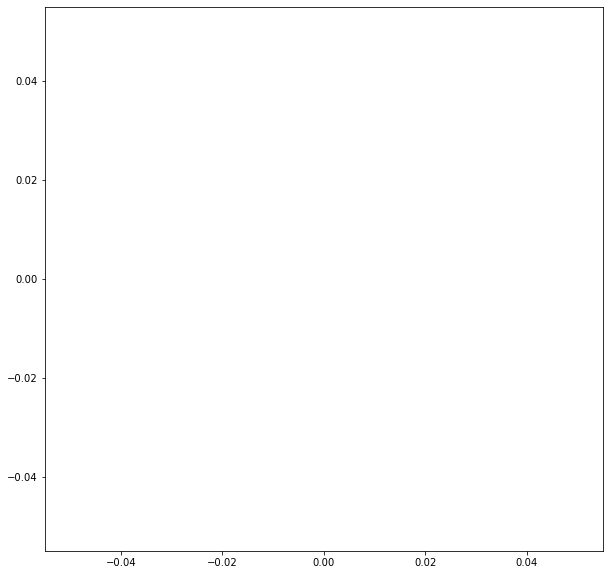

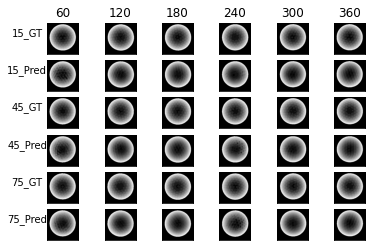

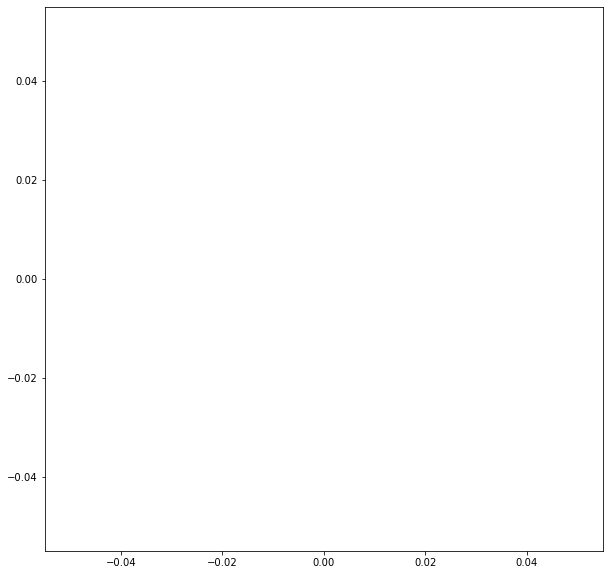

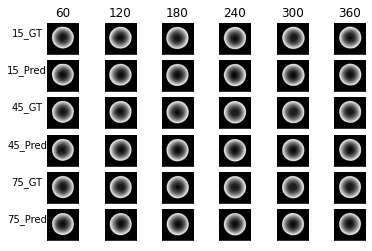

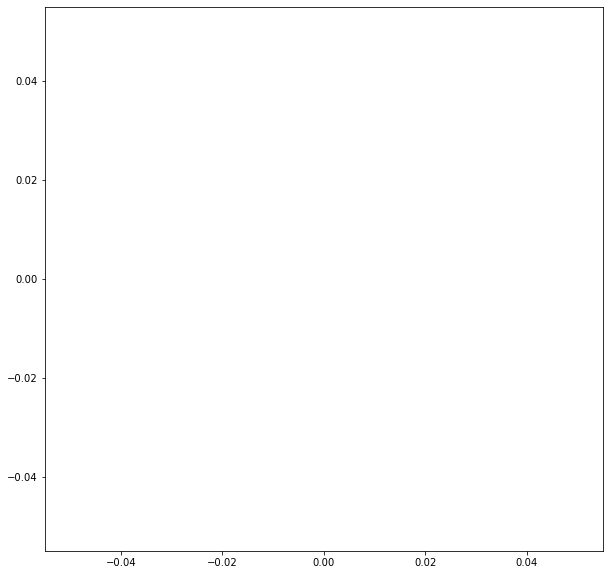

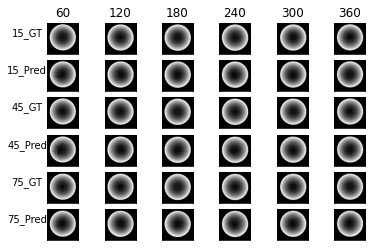

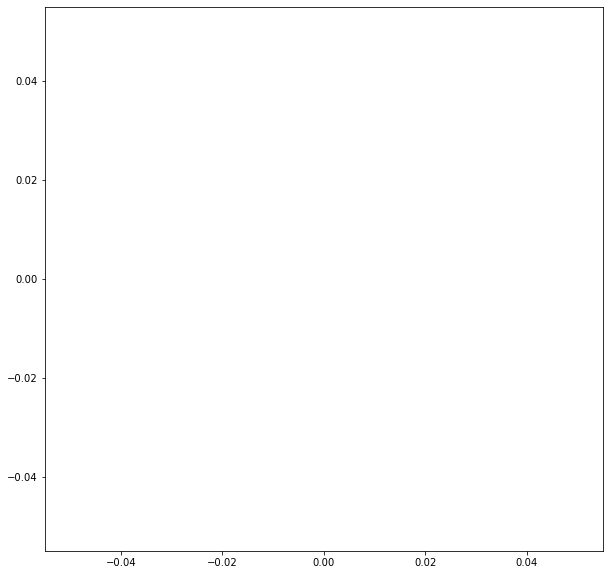

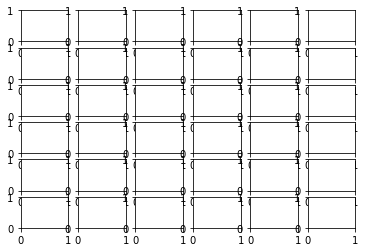

<Figure size 720x720 with 0 Axes>

In [129]:
name_list = []
name_list += ["soccerball" for i in range(18)] # 45, 15, 75
name_list += ["baseball" for i in range(18)] # 15, 75, 45
name_list += ["basketball" for i in range(18)] # 15, 75, 45
name_list += ["grenade" for i in range(18)] # 15, 75, 45
name_list += ["masterball" for i in range(18)] # 45, 15, 75
name_list += ["rugbyball" for i in range(18)] # 75, 45, 15
name_list += ["volleyball" for i in range(18)] # 75, 45, 15
name_list += ["golfball" for i in range(18)] # 15, 45, 75
name_list += ["beachball" for i in range(18)] # 15, 45, 75
name_list += ["tennisball" for i in range(18)] # 45, 75, 15

degree_list = []
fig, ax = plt.subplots(nrows=6, ncols=6)
plt.figure(figsize=(10,10))
for idx, (gt, pred, name) in enumerate(zip(gt_list, pred_list, name_list)):
    row = idx % 6
    col = (idx // 6) % 3

    ax.flat[row].set_title('{}'.format((row*60+60)))
    gt_result = np.exp((gt[0]-1) * 3.70378) * 15 - 1
    gt_result = (gt_result - gt_result.min()) / (gt_result.max() - gt_result.min()) * 255
    gt_result = np.uint8(gt_result)
    gt_result = cv2.equalizeHist(gt_result)
    ax.flat[col*12 + row].imshow(gt_result, cmap='gray')
    ax.flat[col*12 + row].get_xaxis().set_ticks([])
    ax.flat[col*12 + row].get_yaxis().set_ticks([])
    ax.flat[col*12].set_ylabel('{}_GT'.format(15+(30*col)),rotation=0, labelpad=20)

    pred_result = np.exp((pred[0]-1) * 3.70378) * 15 - 1
    pred_result = (pred_result - pred_result.min()) / (pred_result.max() - pred_result.min()) * 255
    pred_result = np.uint8(pred_result)
    pred_result = cv2.equalizeHist(pred_result)
    ax.flat[col*12 + row + 6].imshow(pred_result, cmap="gray")
    ax.flat[col*12 + row + 6].get_xaxis().set_ticks([])
    ax.flat[col*12 + row + 6].get_yaxis().set_ticks([])
    ax.flat[col*12 + 6].set_ylabel('{}_Pred'.format(15+(30*col)),rotation=0, labelpad=20)

    if (idx+1) % 18 == 0:
        plt.tight_layout()
        plt.plot()
        plt.show()
        fig.savefig("{}_example.png".format(name), dpi=500)
        plt.close()
        fig, ax = plt.subplots(nrows=6, ncols=6)
        plt.figure(figsize=(10,10))

In [3]:
def calculate_cdf(histogram):
    """
    This method calculates the cumulative distribution function
    :param array histogram: The values of the histogram
    :return: normalized_cdf: The normalized cumulative distribution function
    :rtype: array
    """
    # Get the cumulative sum of the elements
    cdf = histogram.cumsum()
 
    # Normalize the cdf
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf
 
def calculate_lookup(src_cdf, ref_cdf):
    """
    This method creates the lookup table
    :param array src_cdf: The cdf for the source image
    :param array ref_cdf: The cdf for the reference image
    :return: lookup_table: The lookup table
    :rtype: array
    """
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table
 
def match_histograms(src_image, ref_image):
    """
    This method matches the source image histogram to the
    reference signal
    :param image src_image: The original source image
    :param image  ref_image: The reference image
    :return: image_after_matching
    :rtype: image (array)
    """
    # Compute the b, g, and r histograms separately
    # The flatten() Numpy method returns a copy of the array c
    # collapsed into one dimension.
    src_hist_gray, bin_0 = np.histogram(src_image.flatten(), 256, [0,256])
    ref_hist_gray, bin_1 = np.histogram(ref_image.flatten(), 256, [0,256])    
 
    # Compute the normalized cdf for the source and reference image
    src_cdf_gray = calculate_cdf(src_hist_gray)
    ref_cdf_gray = calculate_cdf(ref_hist_gray)
 
    # Make a separate lookup table for each color
    gray_lookup_table = calculate_lookup(src_cdf_gray, ref_cdf_gray)
 
    # Use the lookup function to transform the colors of the original
    # source image
    gray_after_transform = cv2.LUT(src_image, gray_lookup_table)
 
    # Put the image back together
    image_after_matching = cv2.merge([gray_after_transform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
 
    return image_after_matching

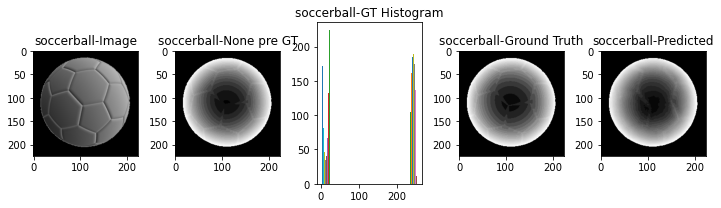

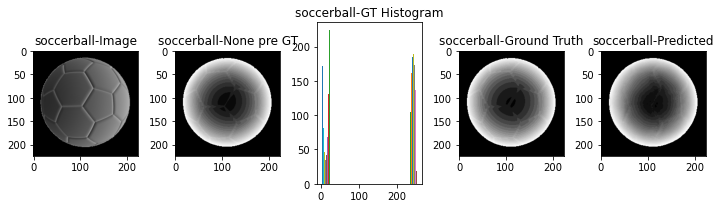

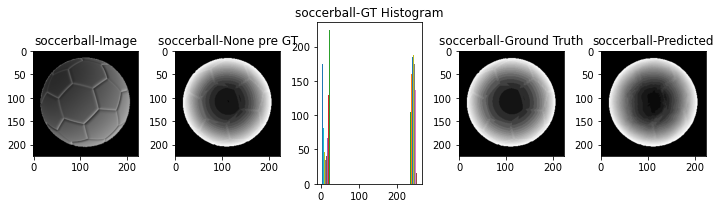

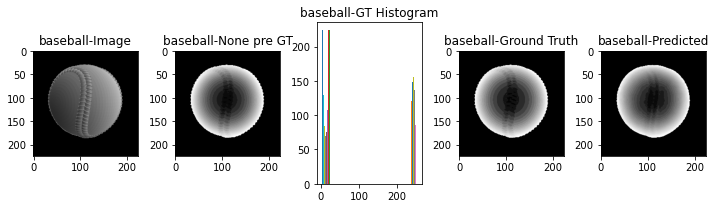

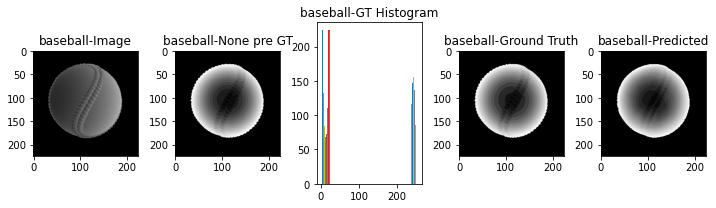

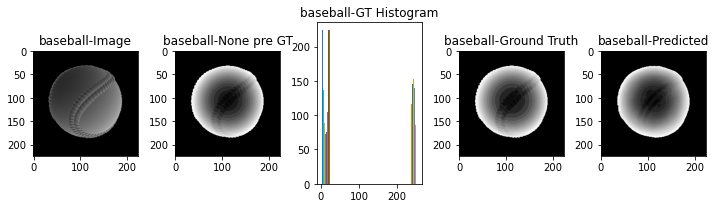

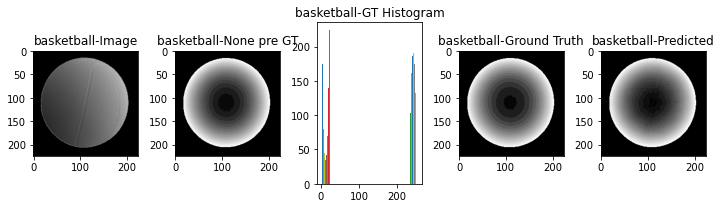

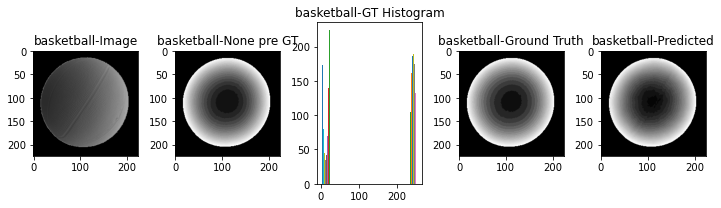

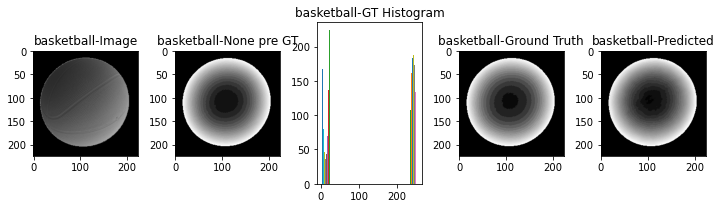

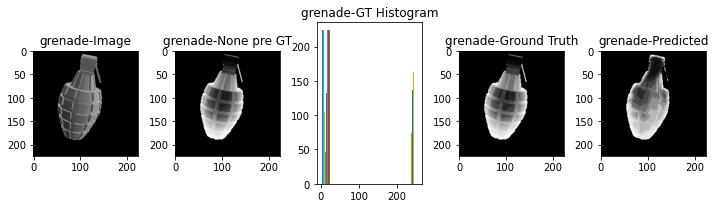

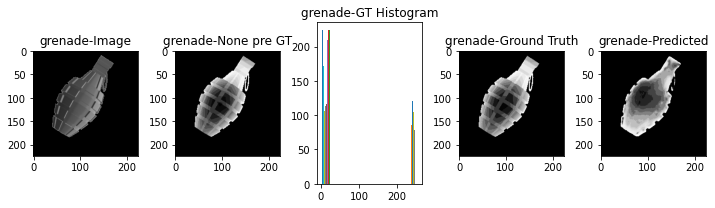

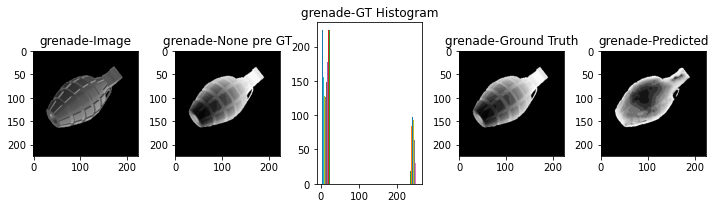

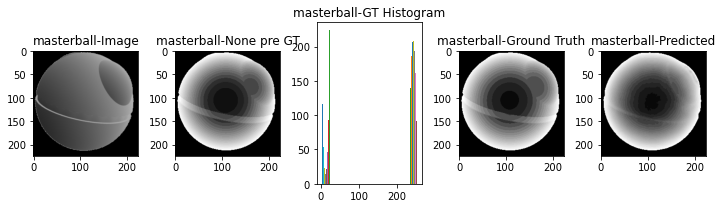

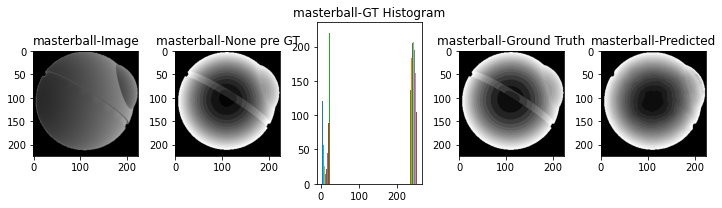

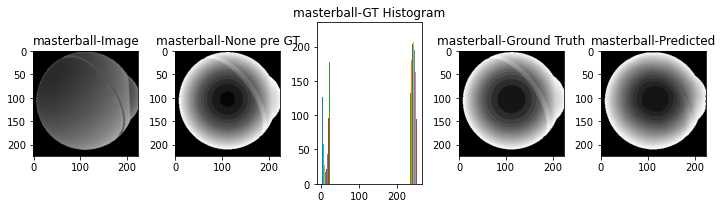

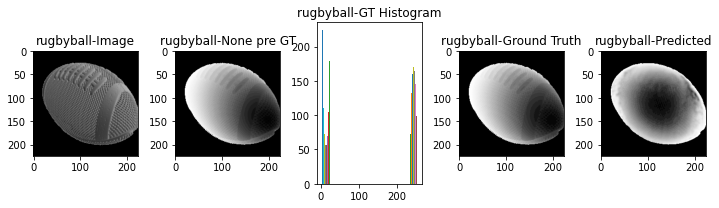

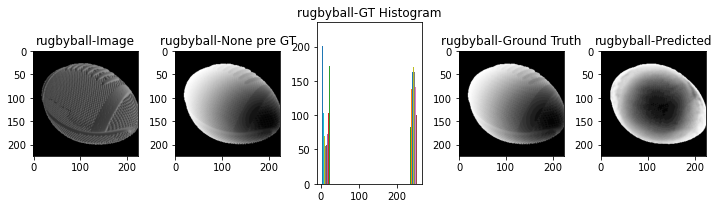

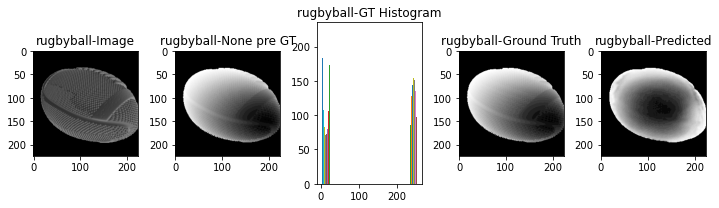

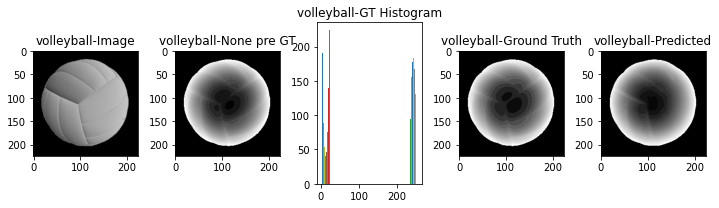

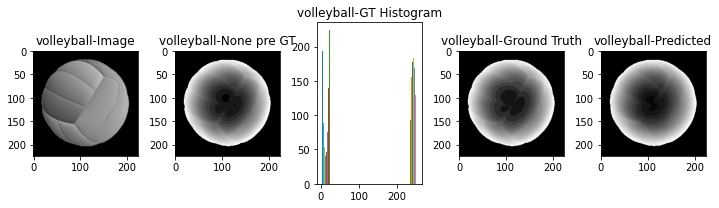

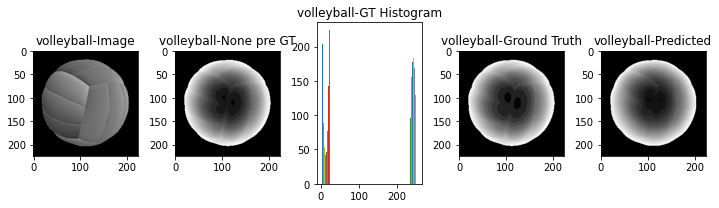

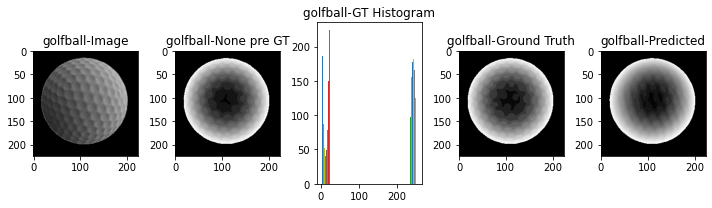

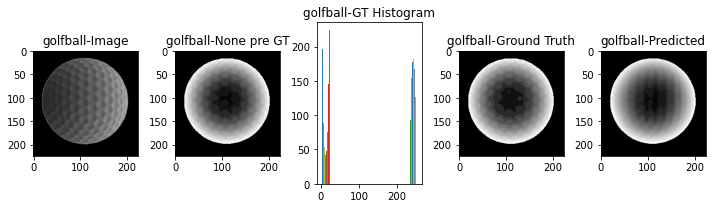

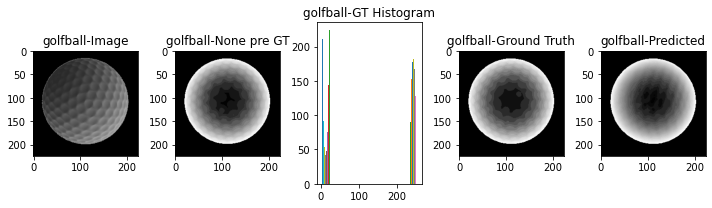

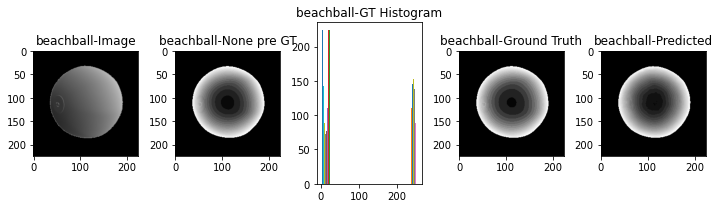

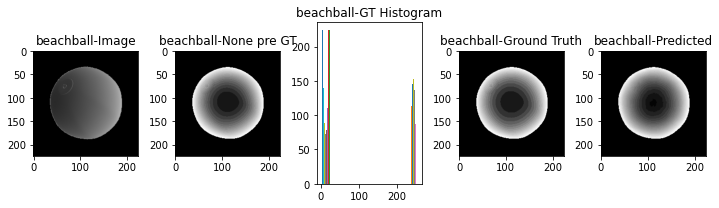

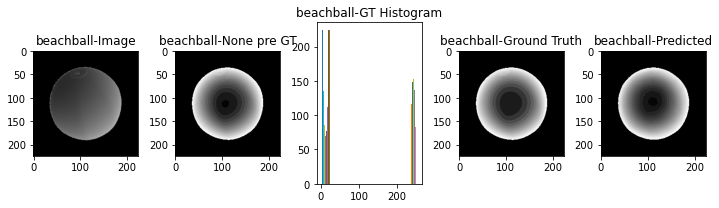

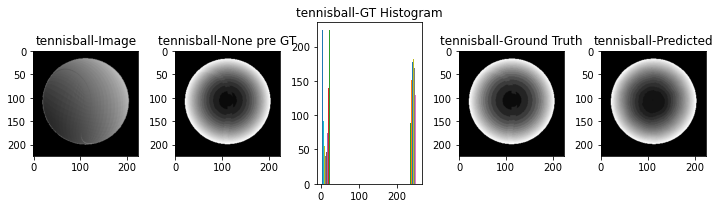

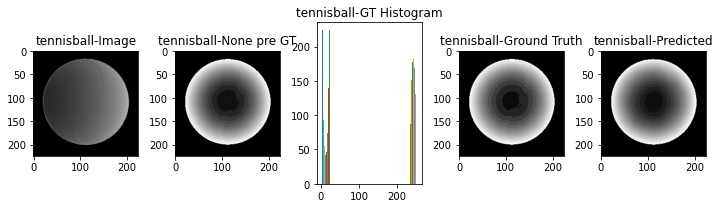

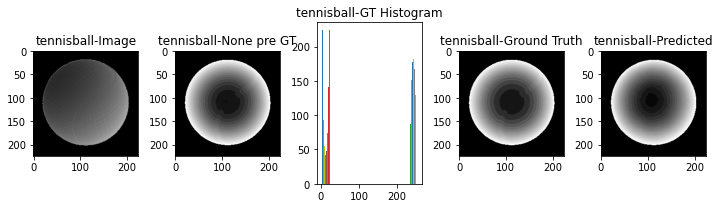

In [4]:
name_list = []
name_list += ["soccerball" for i in range(3)] # 45, 15, 75
name_list += ["baseball" for i in range(3)] # 15, 75, 45
name_list += ["basketball" for i in range(3)] # 15, 75, 45
name_list += ["grenade" for i in range(3)] # 15, 75, 45
name_list += ["masterball" for i in range(3)] # 45, 15, 75
name_list += ["rugbyball" for i in range(3)] # 75, 45, 15
name_list += ["volleyball" for i in range(3)] # 75, 45, 15
name_list += ["golfball" for i in range(3)] # 15, 45, 75
name_list += ["beachball" for i in range(3)] # 15, 45, 75
name_list += ["tennisball" for i in range(3)] # 45, 75, 15

degree_list = []
for idx, (gt, pred, gray, non_gt, name) in enumerate(zip(gt_list, pred_list, gray_list, non_gt_list, name_list)):
    plt.figure(figsize=(10,3))
    plt.subplot(1, 5, 1)
    plt.title('{}-Image'.format(name))
    plt.imshow(gray, cmap="gray")

    plt.subplot(1, 5, 2)
    plt.title('{}-None pre GT'.format(name))
    non_gt_result = (non_gt[0] - non_gt[0].min()) / (non_gt[0].max() - non_gt[0].min()) * 255
    non_gt_result = np.uint8(non_gt_result)
    non_gt_result = cv2.equalizeHist(non_gt_result)
    plt.imshow(non_gt_result[18:224+18, 61:224+61], cmap="gray")

    plt.subplot(1, 5, 3)
    plt.title('{}-GT Histogram'.format(name))
    gt_result = (gt[0] - gt[0].min()) / (gt[0].max() - gt[0].min()) * 255
    gt_result = np.uint8(gt_result)
    plt.hist(gt_result)

    #gt_result = np.exp((gt[0]-1) * 3.70378) * 15 - 1

    plt.subplot(1, 5, 4)
    plt.title('{}-Ground Truth'.format(name))
    gt_result = np.exp((gt[0]-1) * 3.70378) * 15 - 1
    gt_result = (gt_result - gt_result.min()) / (gt_result.max() - gt_result.min()) * 255
    gt_result = np.uint8(gt_result)
    gt_result = cv2.equalizeHist(gt_result)
    #gt_result = match_histograms(gt_result, non_gt_result)#cv2.equalizeHist(gt_result)
    plt.imshow(gt_result, cmap='gray')

    plt.subplot(1, 5, 5)
    plt.title('{}-Predicted'.format(name))
    pred_result = np.exp((pred[0]-1) * 3.70378) * 15 - 1
    pred_result = (pred_result - pred_result.min()) / (pred_result.max() - pred_result.min()) * 255
    pred_result = np.uint8(pred_result)
    pred_result = cv2.equalizeHist(pred_result)
    #pred_result = match_histograms(pred_result, non_gt_result)#cv2.equalizeHist(pred_result)
    plt.imshow(pred_result, cmap="gray")

    plt.tight_layout()
    plt.plot()
    plt.show()

In [5]:
import numpy as np
import cv2

num_list = [0, 3, 11, 9, 13, 21, 15, 18, 26, 12, 20, 25, 1, 5, 23, 16, 22, 29, 4, 14, 24, 6, 7, 17, 8, 10, 28, 2, 19, 27]
gt_list = []
pred_list = []
gray_list = []
non_gt_list = []
for num in num_list:
    gt_list.append(np.load("./output_3/test/ground_truth/npy/depth_image/frame_{:010d}.npy".format(286+num*287)))
    pred_list.append(np.load("./output_3/test/npy/image/depth_{:010d}.npy".format(286+num*287)))
    gray_list.append(cv2.imread("./output_3/test/video/inputs/frame_{:010d}.png".format((num+1)*285*6-1)))
    non_gt_list.append(np.load("./output_3/test/ground_truth/npy/depnpy/depth_{:010d}.npy".format(286+num*287)))

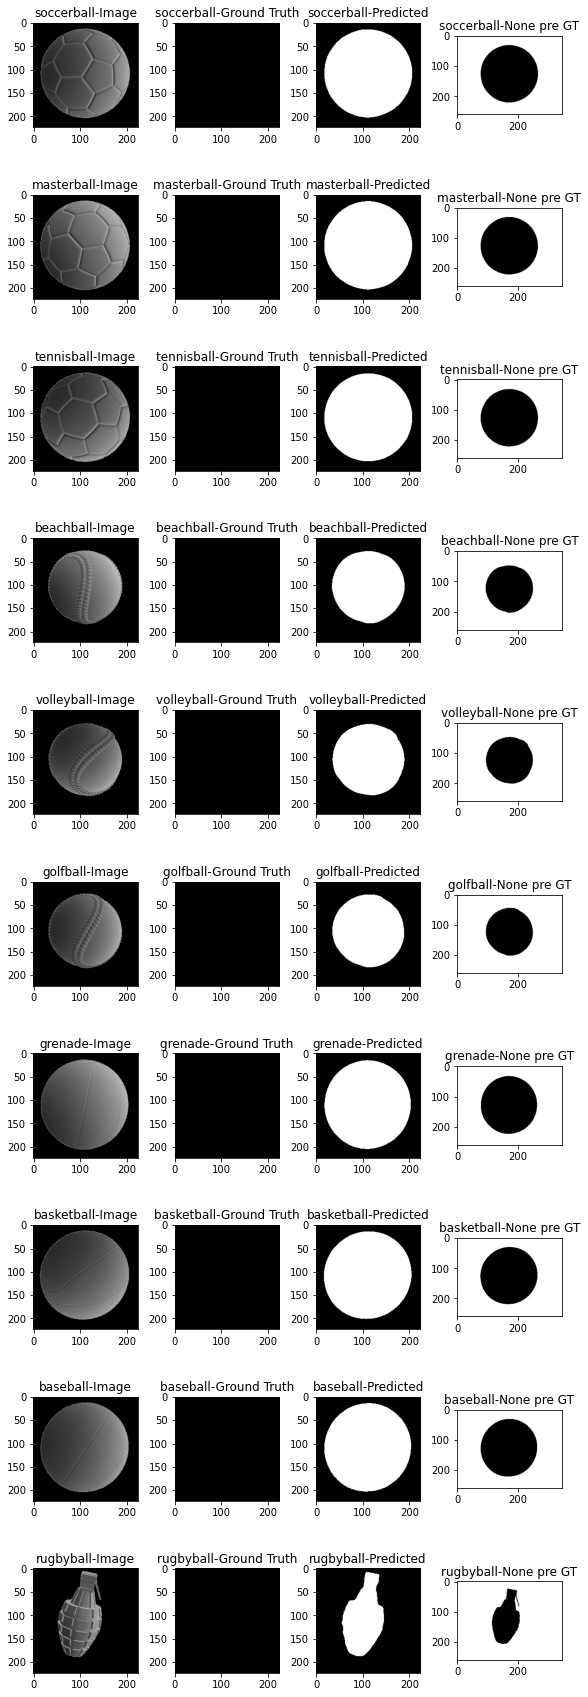

In [6]:
plt.figure(figsize=(8,24))
name_list = ["soccerball","masterball","tennisball","beachball","volleyball","golfball","grenade","basketball","baseball","rugbyball"]
degree_list = []
for idx, (gt, pred, gray, non_gt, name) in enumerate(zip(gt_list, pred_list, gray_list, non_gt_list, name_list)):
#for idx, (gt, pred, gray, name) in enumerate(zip(gt_list, pred_list, gray_list, name_list)):
    plt.subplot(10, 4, idx*4+1)
    plt.title('{}-Image'.format(name))
    plt.imshow(gray, cmap="gray")

    plt.subplot(10, 4, idx*4+2)
    plt.title('{}-Ground Truth'.format(name))
    #gt_result = np.exp((gt[0]-1) * 3.70378) * 15 - 1
    gt_result = gt[0]
    gt_result = np.uint8(gt_result)
    gt_result = cv2.equalizeHist(gt_result)
    plt.imshow(gt_result, cmap='gray')

    plt.subplot(10, 4, idx*4+3)
    plt.title('{}-Predicted'.format(name))
    #pred_result = np.exp((pred[0]-1) * 3.70378) * 15 - 1
    pred_result = pred[0]
    pred_result = np.uint8(pred_result)
    pred_result = cv2.equalizeHist(pred_result)
    plt.imshow(pred_result, cmap="gray")

    plt.subplot(10, 4, idx*4+4)
    plt.title('{}-None pre GT'.format(name))
    non_gt_result = np.uint8(non_gt[0])
#    non_gt_result = cv2.equalizeHist(non_gt_result)
    plt.imshow(non_gt_result, cmap="gray")

plt.tight_layout()
plt.show()

In [7]:
import glob

./test_data/result/grenade_15_result/rgb/data/frame_0000001435.png


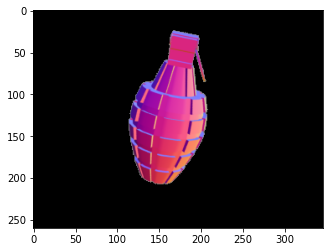

./test_data/result/grenade_75_result/rgb/data/frame_0000001435.png


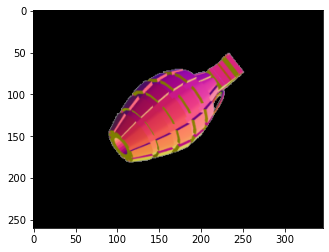

./test_data/result/grenade_45_result/rgb/data/frame_0000001435.png


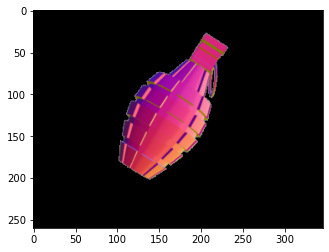

In [8]:
file_list = glob.glob("./test_data/result/grenade_*/rgb/data/frame_0000001435.png")
for file in file_list:
    print(file)
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()